1.	Do data visualization using the data given <br>
a.	Show scatter, histogram, heatmap, box plots (data_1). <br>
b.	Now perform the same for (data_3). <br>
c.	Calculate the statistics for both data sets. <br>
d.	Detect the outliers in data_3 using standard deviation approach and MAD approach. (You can use in-built packages if needed) <br>




In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

filepath = './data_3.xlsx'
q1 = pd.read_excel(filepath)
q1.head()

,x,y
0,4.792464,5.465294
1,4.495052,4.089470
2,5.161569,5.407030
3,6.425300,6.453381
4,4.888931,4.667882


<AxesSubplot:title={'center':'Scatter Plot'}, xlabel='x', ylabel='y'>

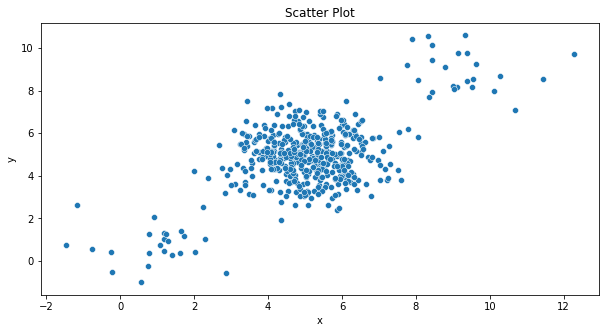

In [3]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot")
sns.scatterplot(data = q1, x = q1['x'], y = q1['y'])

<AxesSubplot:title={'center':'Histogram Combined'}, ylabel='Count'>

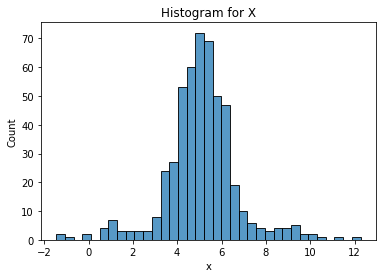

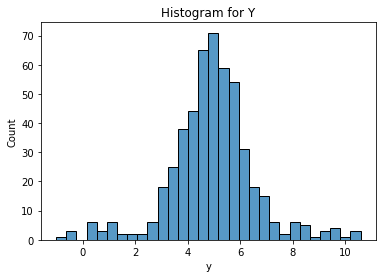

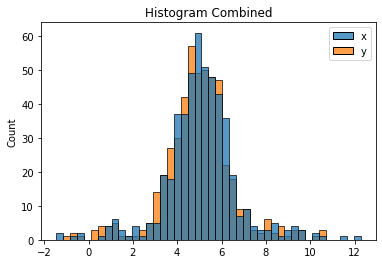

In [4]:
plt.title("Histogram for X")
sns.histplot(data = q1, x = q1['x'])

plt.figure()
plt.title("Histogram for Y")
sns.histplot(data = q1, x = q1['y'])
plt.figure()

plt.title("Histogram Combined")
sns.histplot(data = q1)

Text(0.5, 1.0, 'Density Heatmap')

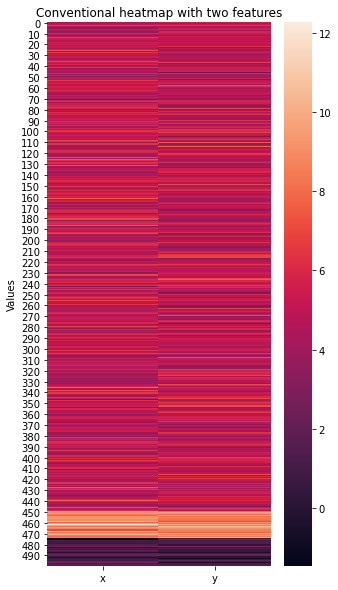

<Figure size 432x288 with 0 Axes>

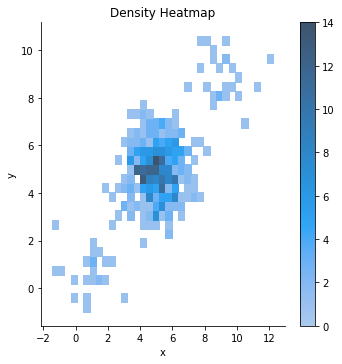

In [5]:
plt.figure(figsize=(5,10))
sns.heatmap(q1)
plt.title("Conventional heatmap with two features")
plt.ylabel("Values")

plt.figure()
sns.displot(q1, x=q1['x'], y = q1['y'], cbar = True)
plt.title("Density Heatmap")

Text(0.5, 1.0, 'BoxPlot for x and y')

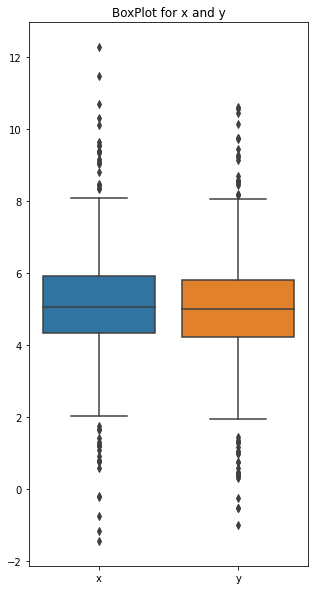

In [6]:
plt.figure(figsize=(5,10))
sns.boxplot(data =q1)
plt.title("BoxPlot for x and y")


In [7]:
stats = q1.describe()
stats

,x,y
count,500.000000,500.000000
mean,5.082468,4.952896
std,1.631735,1.623194
min,-1.458403,-1.004100
25%,4.318981,4.218101
50%,5.054875,4.978847
75%,5.891603,5.782668
max,12.267025,10.589252


- question_d

,x,y
450,10.103937,7.959554
451,9.148413,9.745990
452,9.630313,9.265264
453,8.427969,7.929823
454,7.906331,10.439022
455,9.109233,8.143004
456,9.371449,8.428786
457,9.005201,8.193568
458,9.039507,8.048851
459,10.677985,7.082585


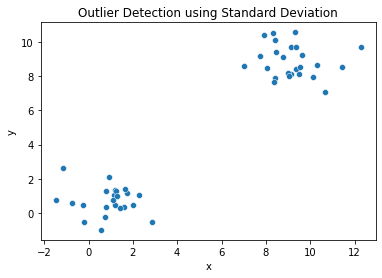

In [8]:
def outlier_detector_std(series):
    outliers = []
    mean = series.iloc[:, :].mean()
    std = series.iloc[:, :].std()
    for i in range(len(series)):
        pts = series.iloc[i]
        k = 2
        if any(abs(pts - mean)/std > k):
            outliers.append(pts)
    return pd.DataFrame(outliers)

answer_d1 = outlier_detector_std(q1)
plt.figure()
plt.title("Outlier Detection using Standard Deviation")
sns.scatterplot(data = answer_d1, x = answer_d1["x"], y = answer_d1["y"])
answer_d1.to_csv("outliers_std.csv")
answer_d1

-----------------------------------------------
Number of Outliers Detected
Standard Deviation Approach:  48
Standard MAD Approach:  45
For the values, refer "q1/Answer1_data_3.ipynb"
------------------------------------------------
45


,x,y
450,10.103937,7.959554
451,9.148413,9.745990
452,9.630313,9.265264
454,7.906331,10.439022
455,9.109233,8.143004
456,9.371449,8.428786
457,9.005201,8.193568
458,9.039507,8.048851
459,10.677985,7.082585
460,7.754726,9.219072


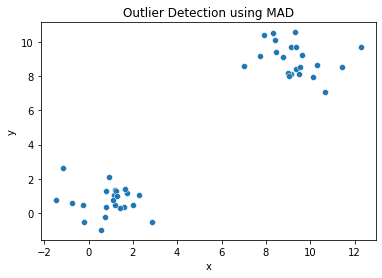

In [15]:
def outlier_detector_MAD(series):
    outliers = []
    median = series.median()
    mad_series = abs(series - median)
    mad = mad_series.median()
    for i in range(len(series)):
        pts = series.iloc[i]
        z = abs(pts - median)*0.6745/mad
        if any(z > 3):
            outliers.append(series.iloc[i])
    return pd.DataFrame(outliers)

answer_d2 = outlier_detector_MAD(q1)

plt.figure()
plt.title("Outlier Detection using MAD")
sns.scatterplot(data = answer_d2, x = answer_d2["x"], y = answer_d2["y"])
answer_d2.to_csv("outliers_MAD.csv")
print("-----------------------------------------------")
print("Number of Outliers Detected")
print("Standard Deviation Approach: ", len(answer_d1))
print("Standard MAD Approach: ", len(answer_d2))
print('For the values, refer "q1/Answer1_data_3.ipynb"')
print("------------------------------------------------")

print(len(answer_d2))
answer_d2
            
        

